# Assignment overview <ignore>
The overarching goal of this assignment is to produce a research report in which you implement, analyse, and discuss various Neural Network techniques. You will be guided through the process of producing this report, which will provide you with experience in report writing that will be useful in any research project you might be involved in later in life.

All of your report, including code and Markdown/text, ***must*** be written up in ***this*** notebook. This is not typical for research, but is solely for the purpose of this assignment. Please make sure you change the title of this file so that XXXXXX is replaced by your candidate number. You can use code cells to write code to implement, train, test, and analyse your NNs, as well as to generate figures to plot data and the results of your experiments. You can use Markdown/text cells to describe and discuss the modelling choices you make, the methods you use, and the experiments you conduct. So that we can mark your reports with greater consistency, please ***do not***:

* rearrange the sequence of cells in this notebook.
* delete any cells, including the ones explaining what you need to do.

If you want to add more code cells, for example to help organise the figures you want to show, then please add them directly after the code cells that have already been provided. 

Please provide verbose comments throughout your code so that it is easy for us to interpret what you are attempting to achieve with your code. Long comments are useful at the beginning of a block of code. Short comments, e.g. to explain the purpose of a new variable, or one of several steps in some analyses, are useful on every few lines of code, if not on every line. Please do not use the code cells for writing extensive sentences/paragraphs that should instead be in the Markdown/text cells.

# Abstract/Introduction (instructions) - 15 MARKS <ignore>
Use the next Markdown/text cell to write a short introduction to your report. This should include:
* a brief description of the topic (image classification) and of the dataset being used (CIFAR10 dataset). (2 MARKS)
* a brief description of how the CIFAR10 dataset has aided the development of neural network techniques, with examples. (3 MARKS)
* a descriptive overview of what the goal of your report is, including what you investigated. (5 MARKS)
* a summary of your major findings. (3 MARKS)
* two or more relevant references. (2 MARKS)

*Enter your abstract/introduction here*
## Abstract
This notebook 
## Introduction
Image classification is for automated systems. 

## Dataset
The dataset used in this investigation is the CIFAR-10 Dataset. CIFAR-10 contains 50,000 training and 10,000 testing images of dimensions 32x32x3. Each image contains one dominant item from ten mutually exclusive classes, equally split in sizes of 6000 over the train/test subsets (A. Krizhevsky 2009).   

CIFAR-10 is one of the most widely used datasets in machine learning (B. Recht et al., 2018), serving as a benchmark dataset for computer vision methods. This mass adoption aids researchers to compare their methods to illustrate performance gains of  new, state-of-the-art classification models, associated steps and parameters; being used in the introduction of Dropout (Srivastava et al., 2014) (and XOXOXOXO), which are/is is considered in this investigation.  


In this investigation, I create a small, baseline CNN-Based model to accurately classify CIFAR-10 images. Three further additions and experiments are conducted on this baseline model with the aim of optimising it. These experiments include: 
- Testing of various learning rates and the implementation of a custom learning rate scheduler.
- Testing the effect of dropout on model performance and generalisation
- [Something else]


 

# Methodology (instructions) - 55 MARKS <ignore>
Use the next cells in this Methodology section to describe and demonstrate the details of what you did, in practice, for your research. Cite at least two academic papers that support your model choices. The overarching prinicple of writing the Methodology is to ***provide sufficient details for someone to replicate your model and to reproduce your results, without having to resort to your code***. You must include at least these components in the Methodology:
* Data - Decribe the dataset, including how it is divided into training, validation, and test sets. Describe any pre-processing you perform on the data, and explain any advantages or disadvantages to your choice of pre-processing. 
* Architecture - Describe the architecture of your model, including all relevant hyperparameters. The architecture must include 3 convolutional layers followed by two fully connected layers. Include a figure with labels to illustrate the architecture.
* Loss function - Describe the loss function(s) you are using, and explain any advantages or disadvantages there are with respect to the classification task.
* Optimiser - Describe the optimiser(s) you are using, including its hyperparameters, and explain any advantages or disadvantages there are to using that optimser.
* Experiments - Describe how you conducted each experiment, including any changes made to the baseline model that has already been described in the other Methodology sections. Explain the methods used for training the model and for assessing its performance on validation/test data.


## Data (7 MARKS) <ignore>

The CIFAR-10 dataset comes pre-split into a training set and testing set of legnths 50,000 and 10,000 respectively. This split is maintained, with the training set being further split into training and validation subsets, the ratio of which will vary on a per-experiment basis.

A single preprocessing step is applied to this data to normalise of the values of each image's pixels, ensuring any created models are not sensitive to the scale of the input features.

Downscaling the dataset's resolution was considered to reduce the number of required trainable parameters and therefore training times, but the findings of Sinha et al.'s 2017 paper shown that retaining CIFAR-10's resolution of 32x32 consistently led to higher model accuracy (conducted over severla CNNs with various hidden layer sizes). Greyscaling the dataset was also considered as a method of size reduction, but was ultimately not chosen due to the  


## Architecture (17 MARKS) <ignore>


## Baseline Model
As stated in the introduction, A baseline CNN is created for all other experiments to use or build upon. 

This baseline model's architecture consists of 3 convolutional layers followed by two fully connected layers


Max-Pooling layers are used after each convolution to reduce the data's dimensionality and to extract the most prominent feature of each layer. Aiding in

<u><b>Baseline Network Layers</b></u>

1. Convolution with 16 channels and 3x3 filters. Relu activations.
2. Max pooling with 2x2 filters and 2x2 stride.
3. Convolution with 32 channels and 3x3 filters. Relu activations, 1px padding.
4. Max pooling with 2x2 filters and 2x2 stride.
5. Convolution with 48 channels and 3x3 filters. Relu activations, 1px padding.
6. Max pooling with 2x2 filters and 2x2 stride.
7. Fully Connected with an output dimension of 160.
8. Fully Connected with an output dimension of 10.

This network's architecture follows the general trend of converting representations from 'wide and shallow' to 'thin and deep' that can be found in other popular CNNs such as Lecun et al's LeNet-5 and 


Weights for all convolutional are initialised from a zero-mean normal distribution with a variance of 1.

An illustration of this model is provided in Figure 1.

A softmax function is not applied to the final layer, as the loss function used (CrossEntropy) handles value checking itself. 

<figure><center><img src="figures/baseline-cnn-architecture.png" width=1200><figcaption> Figure 1: A visualisation of the baseline CNN's architecture.</figcaption></center></figure>

## Loss function (3 MARKS) <ignore>

Cross entropy loss is used throughout this investigation as a loss function. It is well suited towards multi-class classificaiton problems due to its use of all of a network's logits, rather than a single classificaiton value that 






## Optimser (4 MARKS) <ignore>


Adam was initially considered as a network optimiser for its fast training speed, but papers have found Adam to struggle on generalisation tasks. [REF!]

However, as the overall goal of this investigation involves testing each model's generalisation performance on an unseen test set, generalisation performance is preferred over training speed. 
The variation in CIFAR-10's data  
Therefore, Stochastic Gradient Descent with Momentum is chosen, A momentum value of 0.9 is chosen as it 


## Experiments <ignore>
### Experiment 1 (8 MARKS)

Experiment 1 is involved with optimising learning rate used by the network. 

A Train/Validation split of $80:20$ is chosen for experiment 1, a commonly used split for ML tasks. 

To begin, a search to find an optimal static learning rate ($\eta$) for the network is performed. This search is performed over 5 $\eta$-values, which are drawn upon the recommondation of James Bennet (Week 4 Lecture Slide). 
An original set of rates $\eta = 1\mathrm{e}{-1}, 1\mathrm{e}{-2}, 1\mathrm{e}{-3}, 1\mathrm{e}{-4}, 1\mathrm{e}{-5}$ were considered, but initial tests shown that $\eta = 1\mathrm{e}{-1}, 1\mathrm{e}{-5}$ are too unstable and stable, respectively. Therefore, a set of $\eta =  1\mathrm{e}{-2}, 5\mathrm{e}{-3}, 1\mathrm{e}{-3}, 5\mathrm{e}{-4}, \mathrm{1}{e-4}$ is chosen from the range of $\eta \in [1\mathrm{e}{-2}, 1\mathrm{e}{-4}]$. 
Each experiment is trained over 40 epochs to ensure the networks can saturate. For instances where this high number of epochs leads to overfitting, a pseudo-early-stopping technique is employed, where for each experiment run, the model on the epoch with the lowest validation loss is preserved.

Each of these learning rates are ran five times with new weight initialisations to reduce the impact of any outliers found in the test through averaging the test results.

Next, a custom learning rate scheduler is made and also ran 5 times with the same purpose of eliminating outliers.<br>
This scheduler 'steps' $\eta$ down over the previously investigated $\eta$ values at the epoch where the val loss for that $\eta$ is found to plateu: 

$$ \text{step points} = \left\{ x \mid \frac{dy}{dx} \approx 0 \right\} \text{ for each } \eta \quad \text{ where } x = \text{epoch index, }  y = \text{validation loss} $$

Lastly, this custom learning rate scheduler is tested against the best performing static learning rate, on the held pre-split test set.

### Experiment 2 (8 MARKS) <ignore>

Experiment 2 is involved with finding the impact of dropout on the network's linear layers.


To begin, a search to find an optimal dropout chance over the network, where dropout ($p$) is the likelihood of a network's input being set to zero in a forward call.

A 'central' dropout of $p=0.5$ is taken from Srivastava et al.'s paper introducing the concept, recommending 0.5 for 'a wide range of networks and tasks' (N. Srivasta et al. 2014). 

Two additional 'step' values of $p=0.35$ and $p=0.65$ are chosen to investigate the effect lower and higher dropout values have and aid view any trends, with a very high $p=0.85$ value being used to investigate the effect very high dropout can have. Additionally, $p=0$ is chosen to create a comparison point for this experiment's new $50:50$ train/validation split.



[11] Wang D, Mao K. Task-generic semantic convolutional neural network for web text-aided image classification. Neurocomputing, vol. 329, no. 3, pp. 103-115, 2019. 

Good transfer rate over to 

### Experiment 3 (8 MARKS) <ignore>

*Describe how you went about conducting experiment 3 here*

In [1]:
############################################
### Code for building the baseline model ###
############################################

###
# Checking if GPU is available.
###

import torch


device = ("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")



Using device: cuda


In [2]:
###
# Load and Normalise Dataset into batches
###
import torchvision.transforms as transforms
import torchvision.datasets as datasets


# Normalisation dict fn thing, taken from Lab 6's code to normalise CIFAR-10 dataset to mean 0, SD 1.
transform = {
    'train':transforms.Compose([
        transforms.Resize(32),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


# Batch size to use in dataloaders
BATCH_SIZE = 32


# Fetch training dataset and normalise it.
full_train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform['train'])

# Don't create train loader here as dataset needs to be split in differnet ways for later experiemnts
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)



# Create Testing Dataset
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform['test'])
# Create Testing dataloader
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)




# fetch a batch of images and labels for testing (not the NN kind, the mess about to see if things are working kind)
print("Fetching one sample batch from test data.")
dataiter = iter(test_loader)
sample_images, sample_labels = next(dataiter)




# Define Classes
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Create class to ID mapping
id2classes = {idx:clss for idx, clss in enumerate(classes)}

# Create ID to class mapping
classes2id = {clss:idx for idx,clss in id2classes.items()}


Files already downloaded and verified
Files already downloaded and verified
Fetching one sample batch from test data.


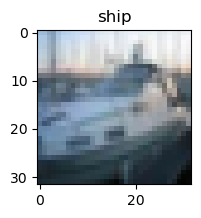

In [4]:
###
# Handy functions for later
###
import numpy as np
import matplotlib.pyplot as plt
import random


def imshow(inp, title=None):
    """
    Shows an image from a Tensor representation.
    Taken from Lab 6 work
    """
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(2, 2))
    plt.grid(False)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


rand = random.randint(0, BATCH_SIZE)
imshow(sample_images[rand], id2classes[int(sample_labels[rand])])

In [5]:
###
# Create the Baseline Network itsself.
###

import torch.nn as nn
import torch.nn.functional as F

class BaselineNetwork(nn.Module):
    """
    Class for a baseline CNN Network with randomly initialised weights.
    """

    def __init__(self):
        """
            Creates the network with already randomised weights.
        """
        super().__init__()
        # Create first cnn layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0) 
        # Create second cnn layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Create third cnn layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=48, kernel_size=3, stride=1, padding=1)

        # Create pooling layer used throughout
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling layer to downsample representations.

        # Create first linear layer
        self.fc1 = nn.Linear(in_features=48*3*3, out_features=160)
        # Create second linear layer
        self.fc2 = nn.Linear(in_features=160, out_features=10)


    def forward(self, x):
        """
            Performs a forward pass of a batch / instance

            args:
                x: The input tensor, a 32x32x3 image.
            returns:
                x: The final FC layer's logits.

        """
        # ---- Convolution Layers ----
        # First CNN layer
        x = self.pool(F.relu(self.conv1(x)))
        # Second CNN layer
        x = self.pool(F.relu(self.conv2(x))) 
        # Third CNN layer
        x = self.pool(F.relu(self.conv3(x)))

        # ---- Linear Layers ----
        # Flatten to use in Linear Layers
        x = x.view(-1, 48*3*3)
        # First Linear Layer
        x = F.relu(self.fc1(x))
        # Second Linear Layer. Doesn't use an activation
        x = self.fc2(x)
        # No softmax function is used here as loss fn handles it.


        return x

    



In [6]:
##
# Code Testing CNN's layer sizes are correct, mainly just to validate the model is actually built correctly.
##

test_net = BaselineNetwork()

print(f"Batch size: {len(sample_images)}")

x0 = sample_images
print(f"x0 shape is: {x0.shape}")

x1 = F.relu(test_net.conv1(x0))
print(f"x1 shape is: {x1.shape}")

x2 = test_net.pool(x1)
print(f"x2 shape is: {x2.shape}")

x3 = F.relu(test_net.conv2(x2))
print(f"x3 shape is: {x3.shape}")

x4 = test_net.pool(x3)
print(f"x4 shape is: {x4.shape}")

x5 = F.relu(test_net.conv3(x4))
print(f"x5 shape is: {x5.shape}")

x6 = test_net.pool(x5)
print(f"x6 shape is: {x6.shape}")

x7 = x6.view(-1, 48*3*3)
print(f"x7 shape is: {x7.shape}")

x8 = F.relu(test_net.fc1(x7))
print(f"x8 shape is: {x8.shape}")

x9 = F.relu(test_net.fc2(x8))
print(f"x9 shape is: {x9.shape}")

pred_logits = test_net.forward(sample_images)
assert list(pred_logits.shape) == [32, 10], "Network does not output expected logits."

del [test_net, pred_logits, x0, x1, x2, x3, x4, x5, x6, x7, x8, x9]

Batch size: 32
x0 shape is: torch.Size([32, 3, 32, 32])
x1 shape is: torch.Size([32, 16, 30, 30])
x2 shape is: torch.Size([32, 16, 15, 15])
x3 shape is: torch.Size([32, 32, 15, 15])
x4 shape is: torch.Size([32, 32, 7, 7])
x5 shape is: torch.Size([32, 48, 7, 7])
x6 shape is: torch.Size([32, 48, 3, 3])
x7 shape is: torch.Size([32, 432])
x8 shape is: torch.Size([32, 160])
x9 shape is: torch.Size([32, 10])


# Results (instructions) - 55 MARKS <ignore>
Use the Results section to summarise your findings from the experiments. For each experiment, use the Markdown/text cell to describe and explain your results, and use the code cell (and additional code cells if necessary) to conduct the experiment and produce figures to show your results.

### Experiment 1 (17 MARKS) <ignore>

write about exp1 here

observe the gap between the validation and training because of overfitting on the network.

In [7]:
#############################
### Code for Experiment 1 ###
#############################

import random 
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch.optim as optim

###
# Functions used for Experiment 1's loss search. 
###



# Splitting training data into subsets of training and validation subsets using 80:20 ratio.
def exp1_create_train_val_split(seed):
    """
    Creates a train/validation split of 80:20 for experiment 1. 
    Split is randomised based on a provided seed.

    Arguments:
        seed: the seed to use for the splitter
    
    Returns:
        Tuple of training dataloader and validation dataloader
    """
    
    # Create generator from provided seed
    generator = torch.Generator().manual_seed(seed)
    
    # Split larger training dataset into a training subset and validation subset.
    train_subset, val_subset = torch.utils.data.random_split(full_train_set, [0.8, 0.2], generator)
    
    # Create dataloader for the training subset
    train_sub_loader = torch.utils.data.DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    # Create dataloader for validation subset.
    val_sub_loader = torch.utils.data.DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    
    # return the two
    return train_sub_loader, val_sub_loader



def exp1_train(model, train_dataloader, loss_fn, optimizer, device):
    """Train Experiment 1's model on a single pass through the dataloader.

    Args:
        model: The model to perform the epoch on
        train_dataloader: The dataloader to use.
        loss_fn: The loss Criterion to use.
        optimizer: the optimizer to use, this is set up with the experiment's learning rate.
        device: The device to train on.
    
    Returns:
        model: The updated model.
        all_train_true_labels: the true training labels from all batches for this epoch.
        all_train_predicted_labels: the predicted training labels from all batches for this epoch.
        average_batch_loss: the average training loss over all of the batches for this epoch. 
        

    """
    
    # Put model into training mode
    model.train()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_train_predicted_labels = []
    all_train_true_labels = []


    # For each batch in the dataloader...
    for _, data in enumerate(train_dataloader,0):
        
        # Get model inputs, data is a list of [inputs, labels]
        inputs, labels = data
        
        # Accumulate true labels from this batch into all true labels list
        all_train_true_labels.extend(labels.tolist())

        # transfer input and labels over to device.
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients.
        optimizer.zero_grad()

        # Perform a forward pass.
        outputs = model(inputs)

        # Get predicted labels for each item in batch
        _, batch_train_predicted_labels = torch.max(outputs, 1)
        # Accumulate predicted labels from this batch into all predictions list
        all_train_predicted_labels.extend(batch_train_predicted_labels.tolist())
        

        
        # Get this batches loss
        loss = loss_fn(outputs, labels)
        # Calculate updated gradients
        loss.backward()
        # Perform network Optimisation
        optimizer.step()

        # get Loss statistics and update running total
        current_loss = loss.item()
        running_loss += current_loss

    # calculate the average batch loss over this epoch.
    average_batch_loss = running_loss / len(train_dataloader)

    return model, all_train_true_labels, all_train_predicted_labels, average_batch_loss



def exp1_evaluate(model, val_dataloader, loss_fn, device):
    """
    Evaluate Experiment 1's model through one pass of the dataloader.

    Args:
        model: The model to evaluate
        val_dataloader: The dataloader to evaluate the model on
        loss_fn: The loss function to use
        device: The device to perform the evaluation on.

    Returns:
        model: The model after evaluation
        all_val_true_labels: All of the true labels from the batches in this epoch.
        all_val_predicted_labels: All of the predicted labels from the batches in this epoch.
        average_batch_loss: The average validation loss over all of the batches in the epoch.
    """

    # Put model into evaluation mode
    model.eval()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_val_true_labels = []
    all_val_predicted_labels = []


    # don't worry about gradients during validation  
    with torch.no_grad():

        #over all batches...
        for _, data in enumerate(val_dataloader, 0):
            
            # Get the model inputs and labels of this batch
            inputs, labels = data

            # Accumulate the true labels of this batch into the all true values list
            all_val_true_labels.extend(labels.tolist())

            # move inputs and labels over to device.
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Perform a forward pass.
            outputs = model(inputs)

            # Get predicted labels for each item in batch
            _, batch_val_predicted_labels = torch.max(outputs, 1)
            # Accumulate predicted labels from this batch into all predictions list
            all_val_predicted_labels.extend(batch_val_predicted_labels.tolist())

            #calculate this batches loss
            loss = loss_fn(outputs, labels)
            current_loss = loss.item()

            running_loss += current_loss

    # calculate the average loss over every batch.
    average_batch_loss = running_loss / len(val_dataloader)

    return model, all_val_true_labels, all_val_predicted_labels, average_batch_loss



def exp1_do_one_lr_experiment(learning_rate, index, num_epochs, train_loader, val_loader):
    """Perform one experiment for experiment 1 with a given learning rate.

    Args:
        learning_rate: The learning rate to use for this experiment.
        index: The index of this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.

    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
        model_list: The list of models over all epochs.
    """
    
    print(f"    Starting sub experiment {index} started.")

    # Create Model
    model = BaselineNetwork()

    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    # momentum of 0.9 is taken from lab 6's code.
    

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []


    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set.
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train(model, train_loader, loss_fn, optimizer, device)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device)
        
        model_list.append(model)
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses and accuracies to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)


        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")

        
    print(f"    Sub experiment {index} completed.")
    # Return the losses and accuracies for this experiment with model list.
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list





In [41]:
###
# Main Experiment Loop to train, validate and collect data for the 25 models.
###

import pickle

# Check if the results file already exists, if it does, warn and exit
try:
    with open("exp1/results/exp1_results.pkl", "rb") as f:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except FileNotFoundError:
    None


# create training and validation dataloaders.
train_loader, val_loader = exp1_create_train_val_split(seed=246518)

# define learning rates to test
# Values taken from lecture slides, found that 1e-1 was way too eratic and 1e-5 was too slow, so ended with values down the middle of the remaining values.
learning_rates = [1e-2, 5e-3, 1e-3, 5e-4 ,1e-4] 

# define number of runs for each learning rate
number_of_experiment_runs = 5

# Number of epochs to train for, originally used 25 but found models didn't plateau, so re-running with 40 epochs.
epochs = 40

# Create dictionary to store all statistics for each learning rate.
all_statistics = {}
# Create dictionary to store the best performing model out of the 5 runs for each learning rate. This includes early stopping!
best_models = {}

# iterate over each learning rate.
for lr in tqdm(learning_rates, desc="Progress through learning rates"):
    print()
    print(f"Starting new averaging loop for learning rate: {lr}...")
    
    # Create dictionary to store all of the statistics for this learning rate with the format { <lr> : {<metric> : {<test_idx>: [epoch1value, epoch2value]} } }
    all_statistics[lr] = {
                        'train_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                        'val_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                        'train_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}, 
                        'val_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}
                        }
    
    

    # create a list to store the best performing models for validation loss for each sub experiment.
    this_subexp_best_models = []

    # iterate over 5 models with different initial weights.
    for test_idx in range(1, number_of_experiment_runs+1):
        
        # train and evaluate one model of the experiment
        train_loss_list, val_loss_list, train_acc_list, val_acc_list, model_list = exp1_do_one_lr_experiment(lr, test_idx, epochs, train_loader, val_loader)
        
        # store the experiment's results lists for this learning rate and test index.
        all_statistics[lr]['train_loss'][test_idx].append(train_loss_list)
        all_statistics[lr]['val_loss'][test_idx].append(val_loss_list)
        all_statistics[lr]['train_acc'][test_idx].append(train_acc_list)
        all_statistics[lr]['val_acc'][test_idx].append(val_acc_list)


        # Get the model with the lowest validation loss for this run and store it.
        best_model_epoch_idx = val_loss_list.index(min(val_loss_list))
        best_model = model_list[best_model_epoch_idx]
        this_subexp_best_models.append((best_model, f"Best model from sub experiment, {test_idx}, epoch {best_model_epoch_idx+1} "))
    
    # Get the best performing model from the 5 runs and store it in the best_models dictionary.
    best_models[lr] = model_list 
    #  ^^^ Turns out i made a mistake here, this should be this_subexp_best_models, not model_list. this_subexp_best_models is the list of best models from each sub experiment, 
    # model_list is the list of all models from each sub experiment. This makes best_models 5x bigger than it should be without indexes or epochs to differentiate the models.  
    # I should re-run this but i'm not going to because it's already taken 5 hours to run this and I don't fancy waiting another 5 hours for it to run again... 
    
    print(f"Completed all experiments for learning rate {lr}.")
    
        

# save results to file
with open("exp1/results/exp1_results.pkl", "wb") as f:
    pickle.dump(all_statistics, f)
    print("Results saved to file")

# Save models to file
with open("exp1/models/exp1_models.pkl", "wb") as f:
    pickle.dump(best_models, f)
    print("Models saved to file")


Progress through learning rates:   0%|          | 0/5 [00:00<?, ?it/s]


Starting new averaging loop for learning rate: 0.01...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 1.5992664309501647, val loss: 1.3045137612202677, train acc: 0.4164, val acc: 0.5307
        Epoch 2 train loss: 1.1649765041351319, val loss: 1.1938108799937435, train acc: 0.586225, val acc: 0.5898
        Epoch 3 train loss: 1.0128870920181274, val loss: 0.9760081117716841, train acc: 0.644125, val acc: 0.6591
        Epoch 4 train loss: 0.9285467993974685, val loss: 0.9463123060263003, train acc: 0.677, val acc: 0.6692
        Epoch 5 train loss: 0.868195174741745, val loss: 0.9000846488407245, train acc: 0.697775, val acc: 0.6886
        Epoch 6 train loss: 0.8193069252490998, val loss: 0.9101356147958067, train acc: 0.715725, val acc: 0.7015
        Epoch 7 train loss: 0.7864585769295692, val loss: 0.8942285814224341, train acc: 0.728625, val acc: 0.6975
        Epoch 8 train loss: 0.7627598438501358, val loss: 0.8516197673048074, train acc: 0.736975, val acc

Progress through learning rates:  20%|██        | 1/5 [59:05<3:56:20, 3545.05s/it]

        Epoch 40 train loss: 0.6200277618408203, val loss: 1.0487773107073177, train acc: 0.79565, val acc: 0.7014
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.01.

Starting new averaging loop for learning rate: 0.005...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 1.6985616307258606, val loss: 1.3855032589488898, train acc: 0.38145, val acc: 0.4954
        Epoch 2 train loss: 1.2551901267051697, val loss: 1.1337144321526964, train acc: 0.550875, val acc: 0.596
        Epoch 3 train loss: 1.0662055346012116, val loss: 1.0546385970549843, train acc: 0.6241, val acc: 0.6337
        Epoch 4 train loss: 0.9524640949010849, val loss: 0.945181500226164, train acc: 0.66665, val acc: 0.6643
        Epoch 5 train loss: 0.8656682316064834, val loss: 0.8694084668502259, train acc: 0.697675, val acc: 0.6983
        Epoch 6 train loss: 0.7985064591646195, val loss: 0.8883320423551261, train acc: 0.72275, val acc: 0.6873
        Epoch 7 train lo

Progress through learning rates:  40%|████      | 2/5 [1:59:10<2:59:02, 3580.71s/it]

        Epoch 40 train loss: 0.3690739125072956, val loss: 1.1568111423581553, train acc: 0.86975, val acc: 0.7176
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.005.

Starting new averaging loop for learning rate: 0.001...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 2.1072569801330565, val loss: 1.8636321408299212, train acc: 0.23015, val acc: 0.3315
        Epoch 2 train loss: 1.6903995175361632, val loss: 1.6118913150062195, train acc: 0.385925, val acc: 0.4162
        Epoch 3 train loss: 1.4832130907058716, val loss: 1.4346967219544675, train acc: 0.463, val acc: 0.4795
        Epoch 4 train loss: 1.3679608760833741, val loss: 1.311633836347074, train acc: 0.5074, val acc: 0.5303
        Epoch 5 train loss: 1.2736480116844178, val loss: 1.2244615674780581, train acc: 0.543675, val acc: 0.5626
        Epoch 6 train loss: 1.189632709646225, val loss: 1.139821180329917, train acc: 0.5776, val acc: 0.5972
        Epoch 7 train loss:

Progress through learning rates:  60%|██████    | 3/5 [2:59:12<1:59:40, 3590.18s/it]

        Epoch 40 train loss: 0.41389477013349535, val loss: 0.8477121103114594, train acc: 0.85405, val acc: 0.7363
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.001.

Starting new averaging loop for learning rate: 0.0005...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 2.2607835267066956, val loss: 2.120747281720463, train acc: 0.15575, val acc: 0.2221
        Epoch 2 train loss: 1.9458663666725158, val loss: 1.8124956772350276, train acc: 0.29945, val acc: 0.3499
        Epoch 3 train loss: 1.6863565127372742, val loss: 1.5966342302937857, train acc: 0.3856, val acc: 0.4076
        Epoch 4 train loss: 1.5490876150131225, val loss: 1.4986012713215984, train acc: 0.43395, val acc: 0.4523
        Epoch 5 train loss: 1.4615410709381103, val loss: 1.435754323919741, train acc: 0.470125, val acc: 0.4791
        Epoch 6 train loss: 1.386510368680954, val loss: 1.356976182506488, train acc: 0.501225, val acc: 0.5106
        Epoch 7 train l

Progress through learning rates:  80%|████████  | 4/5 [3:58:40<59:41, 3581.66s/it]  

        Epoch 40 train loss: 0.6031081760644913, val loss: 0.7765593187877545, train acc: 0.789175, val acc: 0.7434
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.0005.

Starting new averaging loop for learning rate: 0.0001...
    Starting sub experiment 1 started.
        Epoch 1 train loss: 2.299528693771362, val loss: 2.29655220638068, train acc: 0.10525, val acc: 0.1174
        Epoch 2 train loss: 2.2918809127807616, val loss: 2.2866071222689204, train acc: 0.12135, val acc: 0.1376
        Epoch 3 train loss: 2.2740272762298583, val loss: 2.2570679195391867, train acc: 0.177275, val acc: 0.1994
        Epoch 4 train loss: 2.2186480543136597, val loss: 2.175741030385319, train acc: 0.20325, val acc: 0.2265
        Epoch 5 train loss: 2.1156877592086794, val loss: 2.071873247052153, train acc: 0.238725, val acc: 0.2466
        Epoch 6 train loss: 2.035808687400818, val loss: 2.019359785527848, train acc: 0.26035, val acc: 0.2594
        Epoch 7 train lo

Progress through learning rates: 100%|██████████| 5/5 [4:57:58<00:00, 3575.67s/it]

        Epoch 40 train loss: 1.1907355949401854, val loss: 1.20932194542961, train acc: 0.580375, val acc: 0.5717
    Sub experiment 5 completed.
Completed all experiments for learning rate 0.0001.
Results saved to file
Models saved to file


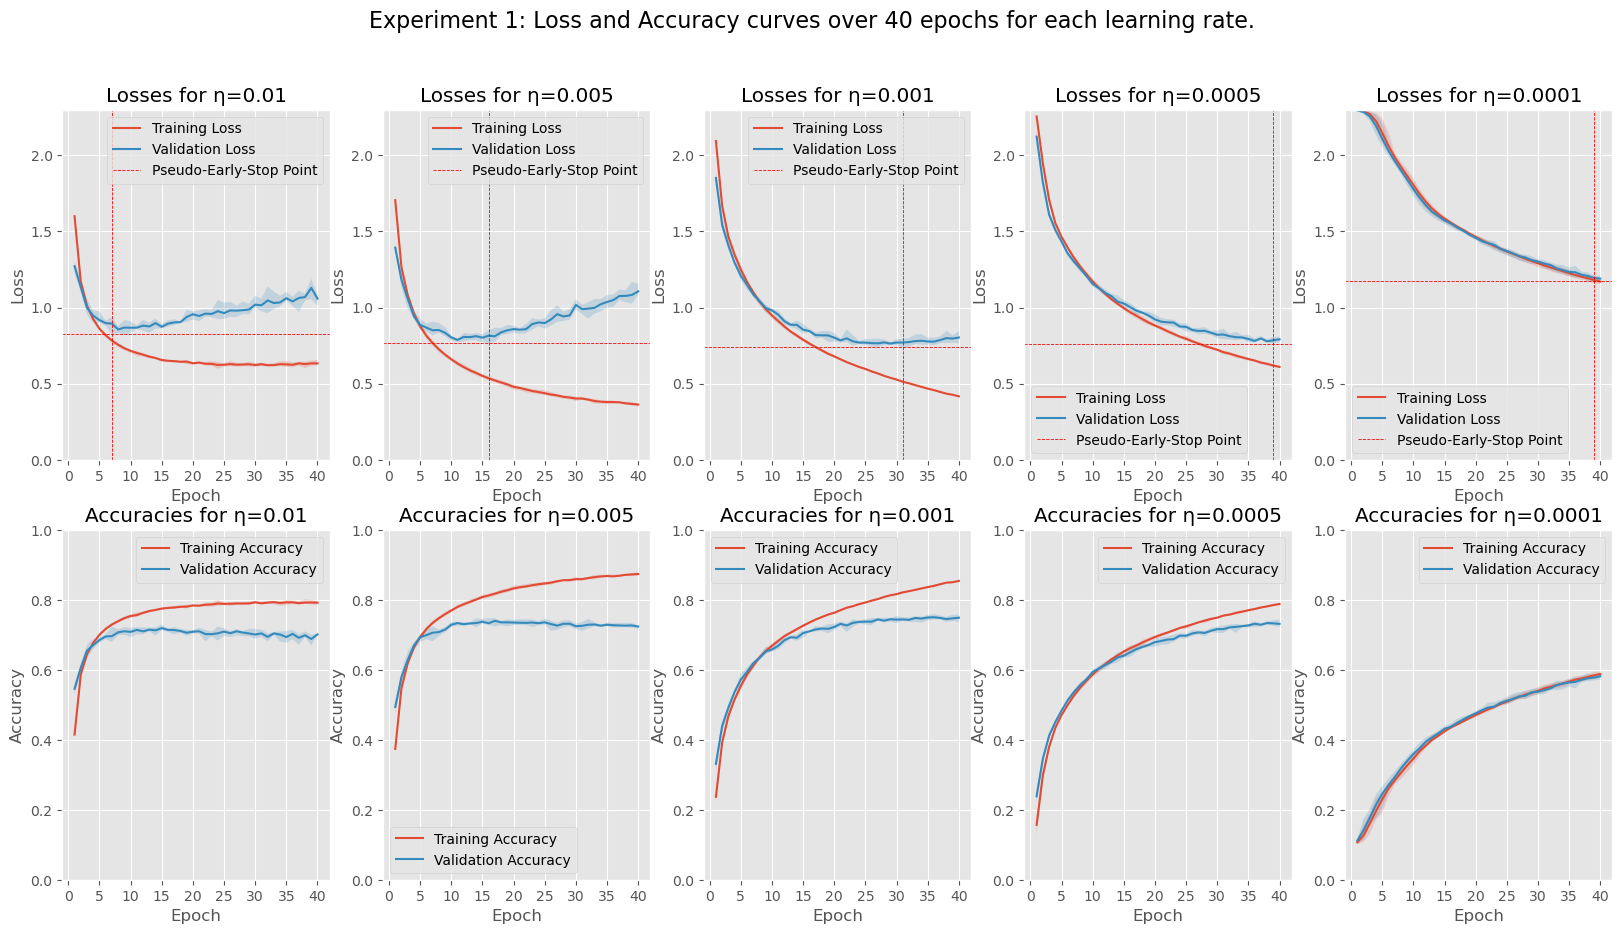

In [34]:
###
# Results for the first part of the experiment, running 5 models for each learning rate.
###

import pickle


# re-make variables as previous cell isn't going to be re-ran.
learning_rates = [1e-2, 5e-3, 1e-3, 5e-4 ,1e-4]
number_of_experiment_runs = 5
epochs = 40


# Load results fom file
with open("exp1/results/exp1_results.pkl", "rb") as file:
    all_statistics = pickle.load(file)



# Create Super Figure for all learning rates
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

fig.suptitle(f"Experiment 1: Loss and Accuracy curves over {epochs} epochs for each learning rate.", fontsize=16)

# For each learning rate...
for i, learning_rate in enumerate(learning_rates):
    # -- This loop will display 2 graphs side by side, one for loss and one for accuracy over the 5 experiments, averaged. --
    
    # get the results for this learning rate
    lr_results = all_statistics[learning_rate]

    # create overall lists to store values for this learning rate.
    val_loss_values = []
    train_loss_values = []
    val_acc_values = []
    train_acc_values = []

    # iterate over each test index, adding values to overall lists.
    for idx in range(1, number_of_experiment_runs+1):
        val_loss_values.append(lr_results['val_loss'][idx])
        train_loss_values.append(lr_results['train_loss'][idx])
        val_acc_values.append(lr_results['val_acc'][idx])
        train_acc_values.append(lr_results['train_acc'][idx])


    # Calculate the average values for each metric over sub experiments.
    average_train_losses = np.mean(train_loss_values, axis=0)[0]
    average_val_losses = np.mean(val_loss_values, axis=0)[0]
    average_train_accs = np.mean(train_acc_values, axis=0)[0]
    average_val_accs = np.mean(val_acc_values, axis=0)[0]

    # Get the largest values for each metric over all sub experiments.
    max_train_losses = np.max(train_loss_values, axis=0)[0]
    max_val_losses = np.max(val_loss_values, axis=0)[0]
    max_train_accs = np.max(train_acc_values, axis=0)[0]
    max_val_accs = np.max(val_acc_values, axis=0)[0]

    # Get the smallest values for each metric over all sub experiments.
    min_train_losses = np.min(train_loss_values, axis=0)[0]
    min_val_losses = np.min(val_loss_values, axis=0)[0]
    min_train_accs = np.min(train_acc_values, axis=0)[0]
    min_val_accs = np.min(val_acc_values, axis=0)[0]

    # Get the index of the best performing epoch for this learning rate.
    best_val_loss_epoch = int(np.argmin(min_val_losses)) + 1



    # create epoch range for x axis
    epoch_range = list(range(1, epochs+1))


    # plot training and validation loss graphs
    axs[0, i].plot(epoch_range, average_train_losses, label="Training Loss") # plot average training loss
    axs[0, i].plot(epoch_range, average_val_losses, label="Validation Loss") # plot average validation loss
    axs[0, i].axvline(best_val_loss_epoch, color='r', linestyle='--', linewidth=0.6, label="Pseudo-Early-Stop Point") # plot line going to best val loss epoch
    axs[0, i].axhline(min_val_losses[best_val_loss_epoch-1], color='r', linestyle='--', linewidth=0.6) # plot line going to best val loss value
    axs[0, i].fill_between(epoch_range, min_train_losses, max_train_losses, alpha=0.2) # add fill between min and max train values
    axs[0, i].fill_between(epoch_range, min_val_losses, max_val_losses, alpha=0.2) # add fill between min and max val values
    axs[0, i].set_title(f"Losses for η={learning_rate}") # add title
    axs[0, i].set_xlabel("Epoch") # set x label to epoch
    axs[0, i].set_ylabel("Loss") # set y label to loss
    axs[0, i].legend() # turn on legend
    axs[0, i].grid(True) # turn on grid
    axs[0, i].set_ylim(0, 2.3) # set y limit to 2.3
    axs[0, i].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs


    # plot training and validation accuracy graphs
    axs[1, i].plot(epoch_range, average_train_accs, label="Training Accuracy") # plot average training accuracy
    axs[1, i].plot(epoch_range, average_val_accs, label="Validation Accuracy") # plot average validation accuracy
    axs[1, i].fill_between(epoch_range, min_train_accs, max_train_accs, alpha=0.2) # add fill between min and max train values
    axs[1, i].fill_between(epoch_range, min_val_accs, max_val_accs, alpha=0.2) # add fill between min and max val values 
    axs[1, i].set_title(f"Accuracies for η={learning_rate}") # add title
    axs[1, i].set_xlabel("Epoch") # set x label to epoch
    axs[1, i].set_ylabel("Accuracy") # set y label to accuracy
    axs[1, i].legend() # turn on legend
    axs[1, i].grid(True) # turn on grid
    axs[1, i].set_ylim(0, 1) # set y limit to 1
    axs[1, i].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

# Show super figure
plt.show()


C:\Users\td336\AppData\Local\Temp\ipykernel_31140\348267869.py:9: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


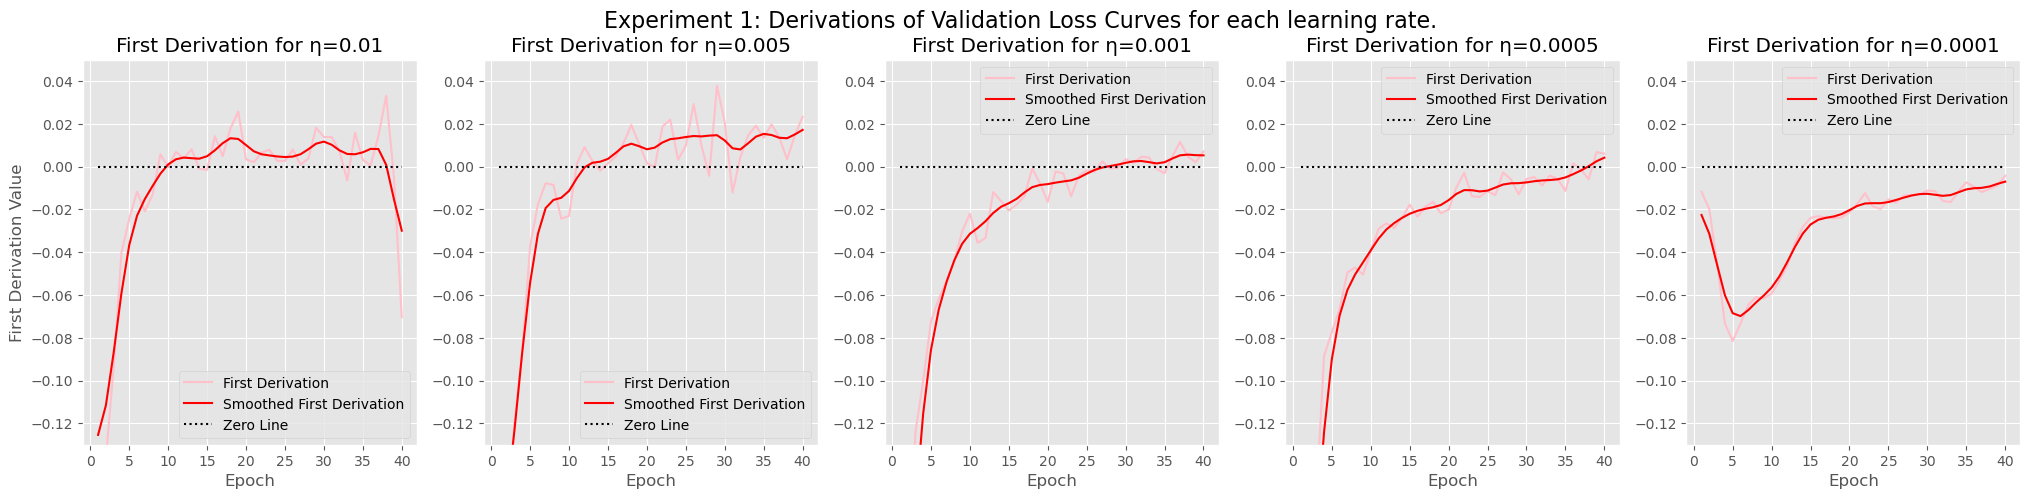

In [41]:
##################################
### !!!LR SCHEDULER SECTION!!! ###
##################################

###
# Finding inflection points of each learning rate's loss curve over the validation set for use in the LR scheduler.
###

from scipy.ndimage.filters import gaussian_filter1d

# Create Super Figure for the first and second derivations of the loss curves.
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle(f"Experiment 1: Derivations of Validation Loss Curves for each learning rate.", fontsize=16)

# Display the first and second derivations of the loss curves for each learning rate.
for i, learning_rate in enumerate(learning_rates):

    # get the results for this learning rate
    lr_results = all_statistics[learning_rate]

    # create list for this learning rate's validation loss values.
    val_loss_values = []


    # iterate over each test index, adding val loss to overall list.
    for idx in range(1, number_of_experiment_runs+1):
        val_loss_values.append(lr_results['val_loss'][idx])

    # calculate the average validation loss over all sub experiments for each lr value.
    average_val_losses = np.mean(val_loss_values, axis=0)[0]


    # calculate the first and second derivations. 
    val_loss_first_derivations = np.gradient(average_val_losses)


    # smooth the line to remove slight noise and find overall trend.
    val_loss_first_derivations_smooth = gaussian_filter1d(val_loss_first_derivations, sigma=1.5)

    

    # create epoch range for x axis
    epoch_range = list(range(1, epochs+1))

    # Plot first derivations
    axs[i].plot(epoch_range, val_loss_first_derivations, color='pink', label="First Derivation")
    axs[i].plot(epoch_range, val_loss_first_derivations_smooth, color='red', label="Smoothed First Derivation")
    axs[i].plot(epoch_range, [0]*len(epoch_range), color='black', linestyle='dotted', label="Zero Line")
    axs[i].set_title(f"First Derivation for η={learning_rate}")
    axs[i].set_xlabel("Epoch")
    axs[0].set_ylabel("First Derivation Value")
    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_ylim(-0.13, 0.05)
    axs[i].set_xticks(np.arange(0, 41, 5))


# show the super plot
plt.show()

In [10]:


###
# Create new training function for the LR scheduler part of the experiment.
# Create the LR scheduler and all of the functions needed to run the experiment.
###

import torch.optim.lr_scheduler as lr_scheduler


def lr_scheduler_lambda(epoch: int) -> float:
    """
        Lambda function to create a custom lr scheduler.

        Args:
            epoch: The current epoch number. 
    
        Returns:
            lr: The new learning rate to use for this epoch.
    
    """
    
    # Manually create mapping of epochs(index) to learning rates. 
    # points where lr decreases are at epochs 9, 12, 25 & 35. 
    epoch_lr_mapping = [1e-2] * 9 + [5e-3] * 3 + [1e-3] * 13 + [5e-4] * 10 + [1e-4] * 6


    # return the learning rate for this epoch.
    return epoch_lr_mapping[epoch]
        
    




def exp1_train_with_lr_scheduler(model, train_dataloader, optimizer, loss_fn, device):
    """Train Experiment 1's model on a single pass through the dataloader, using an LR scheduler.

        Args:
            model: The model to perform the epoch on
            train_dataloader: The dataloader to use.
            loss_fn: The loss Criterion to use.
            optimizer: the optimizer to use, this is set up with the experiment's learning rate.
            scheduler: The learning rate scheduler to use.
            device: The device to train on.
        
        Returns:
            model: The updated model.
            all_train_true_labels: the true training labels from all batches for this epoch.
            all_train_predicted_labels: the predicted training labels from all batches for this epoch.
            average_batch_loss: the average training loss over all of the batches for this epoch. 
            
        """
    
    # Put model into training mode
    model.train()

    # Create loss tracking variable
    running_loss = 0

    # Create prediction tracking lists
    all_train_predicted_labels = []
    all_train_true_labels = []


    # For each batch in the dataloader...
    for _, data in enumerate(train_dataloader,0):
        
        # Get model inputs, data is a list of [inputs, labels]
        inputs, labels = data
        
        # Accumulate true labels from this batch into all true labels list
        all_train_true_labels.extend(labels.tolist())

        # transfer input and labels over to device.
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Zero the parameter gradients.
        optimizer.zero_grad()

        # Perform a forward pass.
        outputs = model(inputs)

        # Get predicted labels for each item in batch
        _, batch_train_predicted_labels = torch.max(outputs, 1)
        # Accumulate predicted labels from this batch into all predictions list
        all_train_predicted_labels.extend(batch_train_predicted_labels.tolist())
        

        
        # Get this batches loss
        loss = loss_fn(outputs, labels)
        # Calculate updated gradients
        loss.backward()
        # Perform network Optimisation
        optimizer.step()
        

        # get Loss statistics and update running total
        current_loss = loss.item()
        running_loss += current_loss

    # Perform learning rate scheduler step for each EPOCH, not each batch. 
   

    # calculate the average batch loss over this epoch.
    average_batch_loss = running_loss / len(train_dataloader)

    return model, all_train_true_labels, all_train_predicted_labels, average_batch_loss






def exp1_do_one_experiment_with_scheduler(index, num_epochs, train_loader, val_loader):
    """Perform one experiment for experiment 1 with a custom learning rate scheduler.

    Args:
        index: The index of this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.

    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
    """
    
    print(f"    Starting sub experiment {index} started.")

    # Create Model
    model = BaselineNetwork()

    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer, momentum of 0.9 is taken from lab 6's code/
    # initialise optimizer with 1 so that lambda function calculates learning rates based on multipliers, basically removes a bunch of unnecessary maths i don't want to do.
    optimizer = torch.optim.SGD(model.parameters(), lr=1, momentum=0.9)

    
    # Create learning rate scheduler object using custom lambda function.
    scheduler = lr_scheduler.LambdaLR(optimizer, lr_scheduler_lambda)

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []

    # Create list to store learning rates used for each epoch.
    all_used_lrs = []

    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set with the learning rate scheduler.
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train_with_lr_scheduler(model, train_loader, optimizer, loss_fn,  device)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device)
        
        model_list.append(model)
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses and accuracies to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)


        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")

        # (this bugged me for several hours trying to figure out why my scheduler was giving index errors on my scheduler list!!!) 
        scheduler.step()

        # Track learning rates used:
        last_lr = scheduler.get_last_lr()
        print(f"        Learning rate for ^ epoch: {last_lr}")
        all_used_lrs.append(last_lr)
        
    print(f"    Sub experiment {index} completed.")
    # Return the losses and accuracies for this experiment
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list



In [ ]:
###
# Scheduler Experiment Loop
###

###
# Main Experiment Loop to train, validate and collect data for the 5 models.
###


# Check if the results file already exists, if it does, warn and exit
try:
    with open("exp1/results/exp1_custom_scheduler_results.pkl", "rb") as f:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except FileNotFoundError:
    None


# create training and validation dataloaders.
train_loader, val_loader = exp1_create_train_val_split(seed=246518)

# define parameters for the experiment
number_of_experiment_runs = 5
epochs = 40

# Create dictionary to store all of the statistics with the format {<metric> : { <test_idx> : [epoch1value, epoch2value] } }
scheduler_statistics = {
                    'train_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'val_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'train_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}, 
                    'val_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}
                    }


# iterate over 5 models with different initial weights.
for test_idx in range(1, number_of_experiment_runs+1):
    

    
    # train and evaluate one model.
    train_loss_list, val_loss_list, train_acc_list, val_acc_list, model_list = exp1_do_one_experiment_with_scheduler(test_idx, epochs, train_loader, val_loader)
    

    # store the experiment's results lists for this learning rate and test index.
    scheduler_statistics['train_loss'][test_idx].append(train_loss_list)
    scheduler_statistics['val_loss'][test_idx].append(val_loss_list)
    scheduler_statistics['train_acc'][test_idx].append(train_acc_list)
    scheduler_statistics['val_acc'][test_idx].append(val_acc_list)


    # Get the model with the lowest validation loss for this run and store it.
    scheduler_best_model_epoch_idx = val_loss_list.index(min(val_loss_list))
    scheduler_best_model = model_list[scheduler_best_model_epoch_idx]
    



# save results to file
with open("exp1/results/exp1_custom_scheduler_results.pkl", "wb") as f:
    pickle.dump(scheduler_statistics, f)
    print("Results saved to file")

# Save models to file
with open("exp1/models/best_custom_scheduler_model.pkl", "wb") as f:
    pickle.dump(scheduler_best_model, f)
    print("Models saved to file")


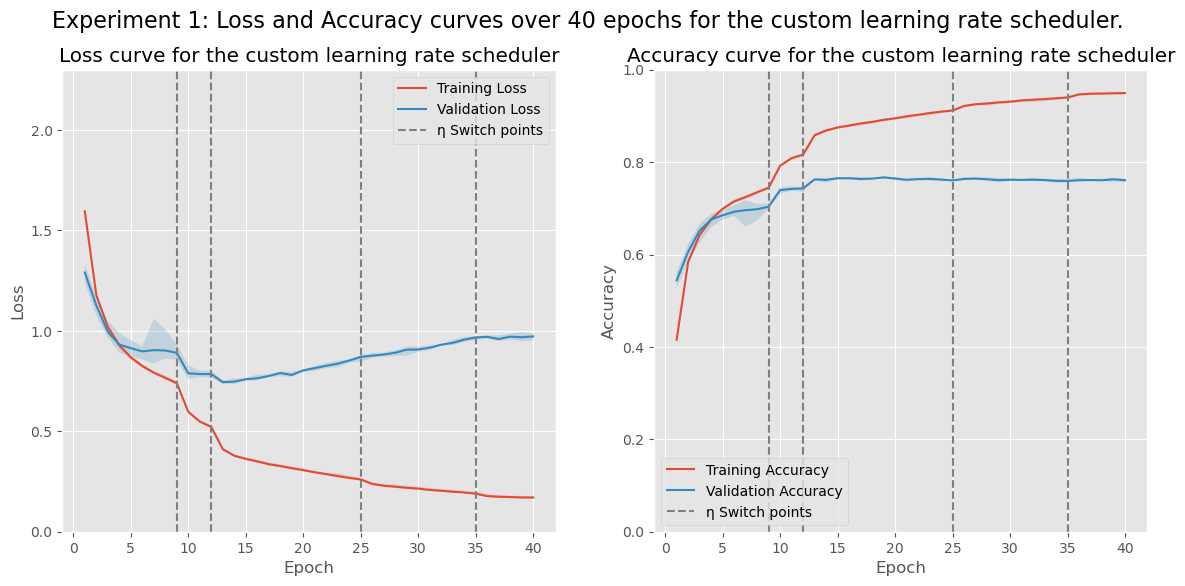

In [40]:
# Load results from file
with open("exp1/results/exp1_custom_scheduler_results.pkl", "rb") as file:
    scheduler_statistics = pickle.load(file)


# create overall lists to store values for this learning rate.
val_loss_values = []
train_loss_values = []
val_acc_values = []
train_acc_values = []

# iterate over each test index, adding values to overall lists.
for idx in range(1, number_of_experiment_runs+1):
    val_loss_values.append(scheduler_statistics['val_loss'][idx])
    train_loss_values.append(scheduler_statistics['train_loss'][idx])
    val_acc_values.append(scheduler_statistics['val_acc'][idx])
    train_acc_values.append(scheduler_statistics['train_acc'][idx])


# Calculate the average values for each metric over sub experiments.
average_train_losses = np.mean(train_loss_values, axis=0)[0]
average_val_losses = np.mean(val_loss_values, axis=0)[0]
average_train_accs = np.mean(train_acc_values, axis=0)[0]
average_val_accs = np.mean(val_acc_values, axis=0)[0]

# Get the largest values for each metric over all sub experiments.
max_train_losses = np.max(train_loss_values, axis=0)[0]
max_val_losses = np.max(val_loss_values, axis=0)[0]
max_train_accs = np.max(train_acc_values, axis=0)[0]
max_val_accs = np.max(val_acc_values, axis=0)[0]

# Get the smallest values for each metric over all sub experiments.
min_train_losses = np.min(train_loss_values, axis=0)[0]
min_val_losses = np.min(val_loss_values, axis=0)[0]
min_train_accs = np.min(train_acc_values, axis=0)[0]
min_val_accs = np.min(val_acc_values, axis=0)[0]


# create epoch range for x axis
epoch_range = list(range(1, epochs+1))

# Create Super Figure for all learning rates
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle(f"Experiment 1: Loss and Accuracy curves over {epochs} epochs for the custom learning rate scheduler.", fontsize=16)

# plot training and validation loss graphs
axs[0].plot(epoch_range, average_train_losses, label="Training Loss") # plot average training loss
axs[0].plot(epoch_range, average_val_losses, label="Validation Loss") # plot average validation loss
axs[0].vlines([9, 12, 25, 35], 0, 2.3, color='gray', linestyle='dashed', label="η Switch points") # plot vertical lines for changes in learning rate.

axs[0].fill_between(epoch_range, min_train_losses, max_train_losses, alpha=0.2) # add fill between min and max train values
axs[0].fill_between(epoch_range, min_val_losses, max_val_losses, alpha=0.2) # add fill between min and max val values
axs[0].set_title("Loss curve for the custom learning rate scheduler") # add title
axs[0].set_xlabel("Epoch") # set x label to epoch
axs[0].set_ylabel("Loss") # set y label to loss
axs[0].legend() # turn on legend
axs[0].grid(True) # turn on grid
axs[0].set_ylim(0, 2.3) # set y limit to 2.3
axs[0].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs


# plot training and validation accuracy graphs
axs[1].plot(epoch_range, average_train_accs, label="Training Accuracy") # plot average training accuracy
axs[1].plot(epoch_range, average_val_accs, label="Validation Accuracy") # plot average validation accuracy
axs[1].vlines([9, 12, 25, 35], 0, 2.3, color='gray', linestyle='dashed', label="η Switch points") # plot vertical lines for changes in learning rate.

axs[1].fill_between(epoch_range, min_train_accs, max_train_accs, alpha=0.2) # add fill between min and max train values
axs[1].fill_between(epoch_range, min_val_accs, max_val_accs, alpha=0.2) # add fill between min and max val values 
axs[1].set_title("Accuracy curve for the custom learning rate scheduler") # add title
axs[1].set_xlabel("Epoch") # set x label to epoch
axs[1].set_ylabel("Accuracy") # set y label to accuracy
axs[1].legend() # turn on legend
axs[1].grid(True) # turn on grid
axs[1].set_ylim(0, 1) # set y limit to 1
axs[1].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

# Show the super figure

plt.show()


In [13]:
#######################################################################################################################
### Test the best model from scheduler test and compare it to best performing model from first part of experiment 1.###
#######################################################################################################################

###
# Loading models from files
###


# Load the best models from the first part of the experiment
with open("exp1/models/exp1_models.pkl", "rb") as file:
    best_exp1_models = pickle.load(file)

# Load the results from the first part of the experiment. M
with open("exp1/results/exp1_results.pkl", "rb") as file:
    all_results = pickle.load(file)


# --- Find the best model's values from the first part of the experiment. --- messing the formatting up for this earlier on has makes this a massive pain!!!!! ---

# init tracking varibales
best_lr = None
best_experiment_idx = None
best_epoch_idx = None
best_val_loss = float('inf')
# for each learning rate
for lr, measures in all_results.items():
    # check all experiment indexes for loss values
    for experiment_index, loss_list in measures['val_loss'].items():
        loss_list = loss_list[0]
        # check all epochs for loss values
        for epoch_idx, loss_value in enumerate(loss_list):
            # if current loss value is less than the best loss value, update the best values.
            if loss_value < best_val_loss:
                best_lr = lr
                best_experiment_idx = experiment_index
                best_epoch_idx = epoch_idx
                best_val_loss = loss_value

print(f"Best model over LR search has lr: {best_lr}, experiment index: {best_experiment_idx}, epoch index: {best_epoch_idx}, val loss: {best_val_loss}")


# --- loading best models ---

# best model from initial 25 model test
best_experiment_1_model = best_exp1_models[best_lr][best_experiment_idx]

# load best model from scheduler test
with open("exp1/models/best_custom_scheduler_model.pkl", "rb") as file:
    best_scheduler_model = pickle.load(file)



###
# Compare both models on the same test set.
###

# run scheduler model
print("Testing scheduler model...")
_, true_test_labels_scheduler_model, predicted_test_labels_scheduler_model, average_test_loss_scheduler_model = exp1_evaluate(best_scheduler_model, test_loader, nn.CrossEntropyLoss(), device)

# run search model
print("Testing search model...")
_, true_test_labels_search_model, predicted_test_labels_search_model, average_test_loss_search_model = exp1_evaluate(best_experiment_1_model, test_loader, nn.CrossEntropyLoss(), device)



Best model over LR search has lr: 0.001, experiment index: 1, epoch index: 30, val loss: 0.7395311202199314
Testing scheduler model...
Testing search model...


Average test loss for scheduler model: 1.0110018564679752
Average test loss for search model: 0.866762349685541
--
Confusion matrix, without normalization


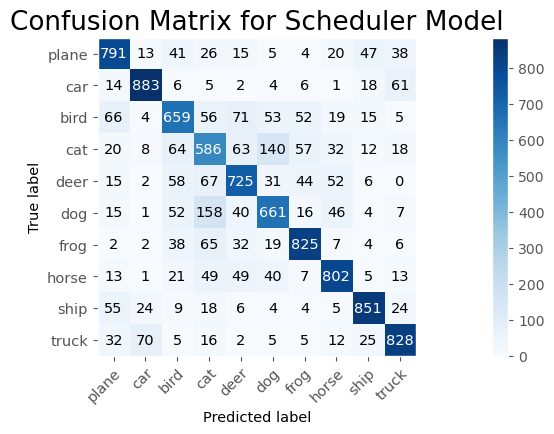

Confusion matrix, without normalization


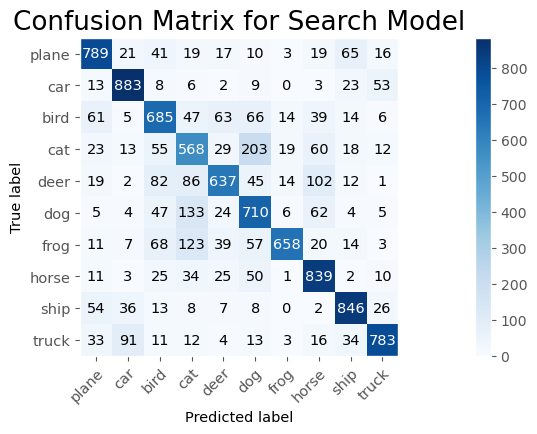

In [14]:
###
# Visualise results for both models.
###

from ml_things import plot_confusion_matrix

# print test loss results
print(f"Average test loss for scheduler model: {average_test_loss_scheduler_model}")
print(f"Average test loss for search model: {average_test_loss_search_model}")

print("--")


# plot confusion matrices for both models

plot_confusion_matrix(true_test_labels_scheduler_model, predicted_test_labels_scheduler_model, magnify=0.06, classes=classes, verbose=False, use_title="Confusion Matrix for Scheduler Model")
plot_confusion_matrix(true_test_labels_search_model, predicted_test_labels_search_model, magnify=0.06, classes=classes, verbose=False, use_title="Confusion Matrix for Search Model")

None

### Experiment 2 (19 MARKS) <ignore>

*Write up results for Experiment 2 here*



gap between dropouts is seen, suggesting the effect of the thing. bla bla bla.

In [15]:
#############################
### Code for Experiment 2 ###
#############################

###
# Functions and Classes used for Experiment 2's Dropout Search
###

class DropoutNetwork(nn.Module):
    """
    Class for the CNN Network with Dropout layers for Experiment 2.
    """

    def __init__(self, dropout_rate):
        """
        Creates the network with randomised weights and with the provided dropout rate.

        Args:
            dropout_rate: The dropout rate to use for the network's FC layers.
        """
        super().__init__()
        
        # Create first cnn layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=0) 
        # Create second cnn layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Create third cnn layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=48, kernel_size=3, stride=1, padding=1)

        # Create pooling layer used throughout
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Pooling layer to downsample representations.

        # Create dropout layer used throughout
        self.dropout = nn.Dropout(p=dropout_rate)

        # Create first linear layer
        self.fc1 = nn.Linear(in_features=48*3*3, out_features=160)
        # Create second linear layer
        self.fc2 = nn.Linear(in_features=160, out_features=10)

    def forward(self, x):
        """
            Performs a forward pass of a batch / instance.

        Args:
            x: The input tensor, a 32x32x3 image.

        Returns:
            x: The final FC layer's logits.
        """
        # First CNN layer
        x = self.pool(F.relu(self.conv1(x)))
        # Second CNN layer
        x = self.pool(F.relu(self.conv2(x)))
        # Third CNN layer
        x = self.pool(F.relu(self.conv3(x)))

        # ---- linear layers ----
        # Flatten to use in linear layers
        x = x.view(-1, 48*3*3)
        # First Dropout layer
        x = self.dropout(x)
        # First Linear layer
        x = F.relu(self.fc1(x))
        # Second Dropout layer
        x = self.dropout(x)
        # Second Linear layer
        x = self.fc2(x)
        # No softmax function as CrossEntropyLoss includes it.


        return x
    
    

def exp2_create_train_val_split(seed):
    """
    Creates a train/validation split of 50:50 for experiment 2. 
    Split is randomised based on a provided seed.

    Arguments:
        seed: the seed to use for the splitter
    
    Returns:
        Tuple of dataloaders for subset 1 and subset 2
    """
    
    # Create generator from provided seed
    generator = torch.Generator().manual_seed(seed)
    
    # Split larger training dataset into a training subset and validation subset.
    train_subset, val_subset = torch.utils.data.random_split(full_train_set, [0.5, 0.5], generator)
    
    # Create dataloader for the first subset
    subset_1_loader = torch.utils.data.DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    # Create dataloader for second subset.
    subset_2_loader = torch.utils.data.DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    
    # return the two
    return subset_1_loader, subset_2_loader


def exp2_do_one_dropout_experiment(dropout_value, index, num_epochs, train_loader, val_loader):
    """Perform one experiment for experiment 2 with a given dropout value.
    This fn is pretty much a copy paste of the first experiment's function with dropout added in.

    Args:
        dropout_value: The dropout value to use for this experiment.
        index: The index of this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.
    
    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
        model_list: The list of models over all epochs.
    """

    print(f"    Starting sub experiment {index}.")

    # Create Dropout model
    model = DropoutNetwork(dropout_value)

    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer using Experiment 1's best performing learning rate (no scheduler, as using no scheduler in experiment 1 performed best)
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []

    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train(model, train_loader, loss_fn, optimizer, device) # turns out exp1 train fn can be used for this, no need to remake it. (i think...)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device) # same story here, should be fine to use exp1's evaluate function.
        
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses, accuracies and models to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        model_list.append(model)
        
        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")

    # Print loss and accuracy values to see how training is going.
    print(f"    Completed sub experiment {index}.")

    # Return the losses and accuracies for this experiment with model list
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list



In [16]:
###
# Main Experiment Loop to train, validate and collect data for 5 dropout rates over 5 models.
###

# Check if the results file already exists, if it does, warn and exit
try:
    with open("exp2/results/exp2_results.pkl", "rb") as f:
        print("Results file already exists. Exiting...")
        raise IOError("Results file already exists.")
except FileNotFoundError:
    None

# create set 1 and set 2 dataloaders.
set_1_loader, set_2_loader = exp2_create_train_val_split(seed=246518)

# Define dropout rates to test
dropout_rates = [0, 0.35, 0.5, 0.65, 0.85] # see 'Experiment 2' experiments section for reasoning behind these values.

# Define number of runs for each dropout rate
number_of_experiment_runs = 5

# Number of epochs to train for.
epochs = 40

# create dictionary to store all statisfics for each dropout rate.
all_dropout_statistics = {}

# Create dictionary to store the best models for each dropout rate.
best_models = {}

# iterate over each dropout rate.
for dr in tqdm(dropout_rates, "Progress through dropout experiments"):
    print()
    print(f"Starting new averaging loop for dropout: {dr}...")

    # create dictionary with empty lists to store all statistics for this dropout rate.
    all_dropout_statistics[dr] = {
                    'train_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'val_loss':{idx:[] for idx in range(1,number_of_experiment_runs+1)},
                    'train_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}, 
                    'val_acc':{idx:[] for idx in range(1,number_of_experiment_runs+1)}
                    }

    # Create a list to store the best performing models for each validation loss over each sub experiment
    this_subexp_best_models = []

    # Iterate over 5 models with different initial weights.
    for test_idx in range(1, number_of_experiment_runs+1):

        # Train and evaluate one model of the experiment.
        train_loss_list, val_loss_list, train_acc_list, val_acc_list, model_list = exp2_do_one_dropout_experiment(dr, test_idx, epochs, set_1_loader, set_2_loader)

        # store the experiment's results lists for this dropout rate and test index.
        all_dropout_statistics[dr]['train_loss'][test_idx].append(train_loss_list)
        all_dropout_statistics[dr]['val_loss'][test_idx].append(val_loss_list)
        all_dropout_statistics[dr]['train_acc'][test_idx].append(train_acc_list)
        all_dropout_statistics[dr]['val_acc'][test_idx].append(val_acc_list)

        # Get the model with the lowest validation loss for this run and store it.
        min_val_loss = min(val_loss_list) # get the minimum validation loss for this sub experiment.
        best_model_epoch_idx = val_loss_list.index(min_val_loss)  # get the index of the best model.
        best_model = model_list[best_model_epoch_idx] # get the best model from the list of models using the calculated index.
        this_subexp_best_models.append({'model':best_model, 'val_loss':min_val_loss, 'epoch':best_model_epoch_idx+1, 'test_idx':test_idx}) # store the best model and some info about it.


    # save the model to the best_models dictionary. doing it properly this time!!!!
    best_models[dr] = this_subexp_best_models
    print(f"Completed all experiments for dropout: {dr}.")

# save results to file
with open("exp2/results/exp2_results.pkl", "wb") as f:
    pickle.dump(all_dropout_statistics, f)
    print("Results saved to file")

# Save models to file
with open("exp2/models/best_dropout_models.pkl", "wb") as f:
    pickle.dump(best_models, f)
    print("Models saved to file")


Progress through dropout experiments:   0%|          | 0/5 [00:00<?, ?it/s]


Starting new averaging loop for dropout: 0...
    Starting sub experiment 1.


c:\Users\td336\AppData\Local\anaconda3\envs\GPUenv\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


        Epoch 1 train loss: 2.1793643725497645, val loss: 2.010071883421115, train acc: 0.19792, val acc: 0.2736
        Epoch 2 train loss: 1.8617744026586527, val loss: 1.7192173824285912, train acc: 0.32236, val acc: 0.37924
        Epoch 3 train loss: 1.622399080287465, val loss: 1.5837215326936043, train acc: 0.40532, val acc: 0.42224
        Epoch 4 train loss: 1.4953448621513288, val loss: 1.46723552311168, train acc: 0.45652, val acc: 0.4656
        Epoch 5 train loss: 1.4124092677670061, val loss: 1.376057291046128, train acc: 0.4878, val acc: 0.508
        Epoch 6 train loss: 1.3322290565504138, val loss: 1.3162951320790879, train acc: 0.52248, val acc: 0.53068
        Epoch 7 train loss: 1.266661154187244, val loss: 1.29869207541656, train acc: 0.54768, val acc: 0.5438
        Epoch 8 train loss: 1.2120014526654996, val loss: 1.2367890398673085, train acc: 0.5706, val acc: 0.5544
        Epoch 9 train loss: 1.1619013130969709, val loss: 1.1678717641726784, train acc: 0.59148

Progress through dropout experiments:  20%|██        | 1/5 [56:42<3:46:50, 3402.64s/it]

        Epoch 40 train loss: 0.48436822357308834, val loss: 0.9077742160738581, train acc: 0.83308, val acc: 0.71008
    Completed sub experiment 5.
Completed all experiments for dropout: 0.

Starting new averaging loop for dropout: 0.35...
    Starting sub experiment 1.
        Epoch 1 train loss: 2.229772129022252, val loss: 2.0498684990741407, train acc: 0.15884, val acc: 0.24464
        Epoch 2 train loss: 1.973597507037775, val loss: 1.8104482015685353, train acc: 0.2688, val acc: 0.34596
        Epoch 3 train loss: 1.7740630236123225, val loss: 1.6990470520370757, train acc: 0.33608, val acc: 0.38664
        Epoch 4 train loss: 1.663979771649441, val loss: 1.5741446329199749, train acc: 0.38668, val acc: 0.4276
        Epoch 5 train loss: 1.5903853867060083, val loss: 1.4967513918266881, train acc: 0.41328, val acc: 0.45512
        Epoch 6 train loss: 1.539976251247289, val loss: 1.4576799607337894, train acc: 0.43756, val acc: 0.47584
        Epoch 7 train loss: 1.48522123244717

Progress through dropout experiments:  40%|████      | 2/5 [1:54:25<2:51:54, 3438.20s/it]

        Epoch 40 train loss: 0.8655115812635787, val loss: 0.8359737703028847, train acc: 0.69412, val acc: 0.70492
    Completed sub experiment 5.
Completed all experiments for dropout: 0.35.

Starting new averaging loop for dropout: 0.5...
    Starting sub experiment 1.
        Epoch 1 train loss: 2.266932343887856, val loss: 2.130962587683402, train acc: 0.13972, val acc: 0.23396
        Epoch 2 train loss: 2.0528388034047373, val loss: 1.9016987442055626, train acc: 0.23864, val acc: 0.315
        Epoch 3 train loss: 1.873906119095395, val loss: 1.7205296337147198, train acc: 0.30836, val acc: 0.37084
        Epoch 4 train loss: 1.7383737448231338, val loss: 1.6255090870820652, train acc: 0.3514, val acc: 0.40232
        Epoch 5 train loss: 1.6549646906230762, val loss: 1.532182332652304, train acc: 0.38912, val acc: 0.43788
        Epoch 6 train loss: 1.600181833405019, val loss: 1.4978998096092888, train acc: 0.4116, val acc: 0.4476
        Epoch 7 train loss: 1.5542539437408642,

Progress through dropout experiments:  60%|██████    | 3/5 [2:52:09<1:55:00, 3450.01s/it]

        Epoch 40 train loss: 0.9644615323570989, val loss: 0.860951615378375, train acc: 0.66136, val acc: 0.69696
    Completed sub experiment 5.
Completed all experiments for dropout: 0.5.

Starting new averaging loop for dropout: 0.65...
    Starting sub experiment 1.
        Epoch 1 train loss: 2.2641552909255944, val loss: 2.1660660221753525, train acc: 0.14392, val acc: 0.21312
        Epoch 2 train loss: 2.111435478453136, val loss: 1.9954518485252204, train acc: 0.21128, val acc: 0.28076
        Epoch 3 train loss: 1.9660220202582572, val loss: 1.8027723274572427, train acc: 0.255, val acc: 0.33244
        Epoch 4 train loss: 1.8411227397601624, val loss: 1.7200833545316516, train acc: 0.29508, val acc: 0.37412
        Epoch 5 train loss: 1.7685854375514838, val loss: 1.6383495542704296, train acc: 0.3318, val acc: 0.3944
        Epoch 6 train loss: 1.7064634474647014, val loss: 1.5798841121861391, train acc: 0.3594, val acc: 0.41988
        Epoch 7 train loss: 1.64992073887144

Progress through dropout experiments:  80%|████████  | 4/5 [3:49:56<57:36, 3456.52s/it]  

        Epoch 40 train loss: 1.123118487541633, val loss: 0.9930632365176745, train acc: 0.60784, val acc: 0.64212
    Completed sub experiment 5.
Completed all experiments for dropout: 0.65.

Starting new averaging loop for dropout: 0.85...
    Starting sub experiment 1.
        Epoch 1 train loss: 2.301991300814597, val loss: 2.2883279149794515, train acc: 0.11012, val acc: 0.19344
        Epoch 2 train loss: 2.260391103946949, val loss: 2.1612453457644527, train acc: 0.1422, val acc: 0.1982
        Epoch 3 train loss: 2.1616177057366235, val loss: 2.054578564813375, train acc: 0.18232, val acc: 0.21148
        Epoch 4 train loss: 2.06693103764673, val loss: 1.9283962393050913, train acc: 0.19576, val acc: 0.26248
        Epoch 5 train loss: 1.9856564244041053, val loss: 1.857931562854201, train acc: 0.2112, val acc: 0.27588
        Epoch 6 train loss: 1.9443572625479735, val loss: 1.816583582812258, train acc: 0.22816, val acc: 0.31044
        Epoch 7 train loss: 1.919994718735785, 

Progress through dropout experiments: 100%|██████████| 5/5 [4:48:10<00:00, 3458.03s/it]

        Epoch 40 train loss: 1.5305878555073458, val loss: 1.3361422539976857, train acc: 0.414, val acc: 0.49792
    Completed sub experiment 5.
Completed all experiments for dropout: 0.85.
Results saved to file
Models saved to file


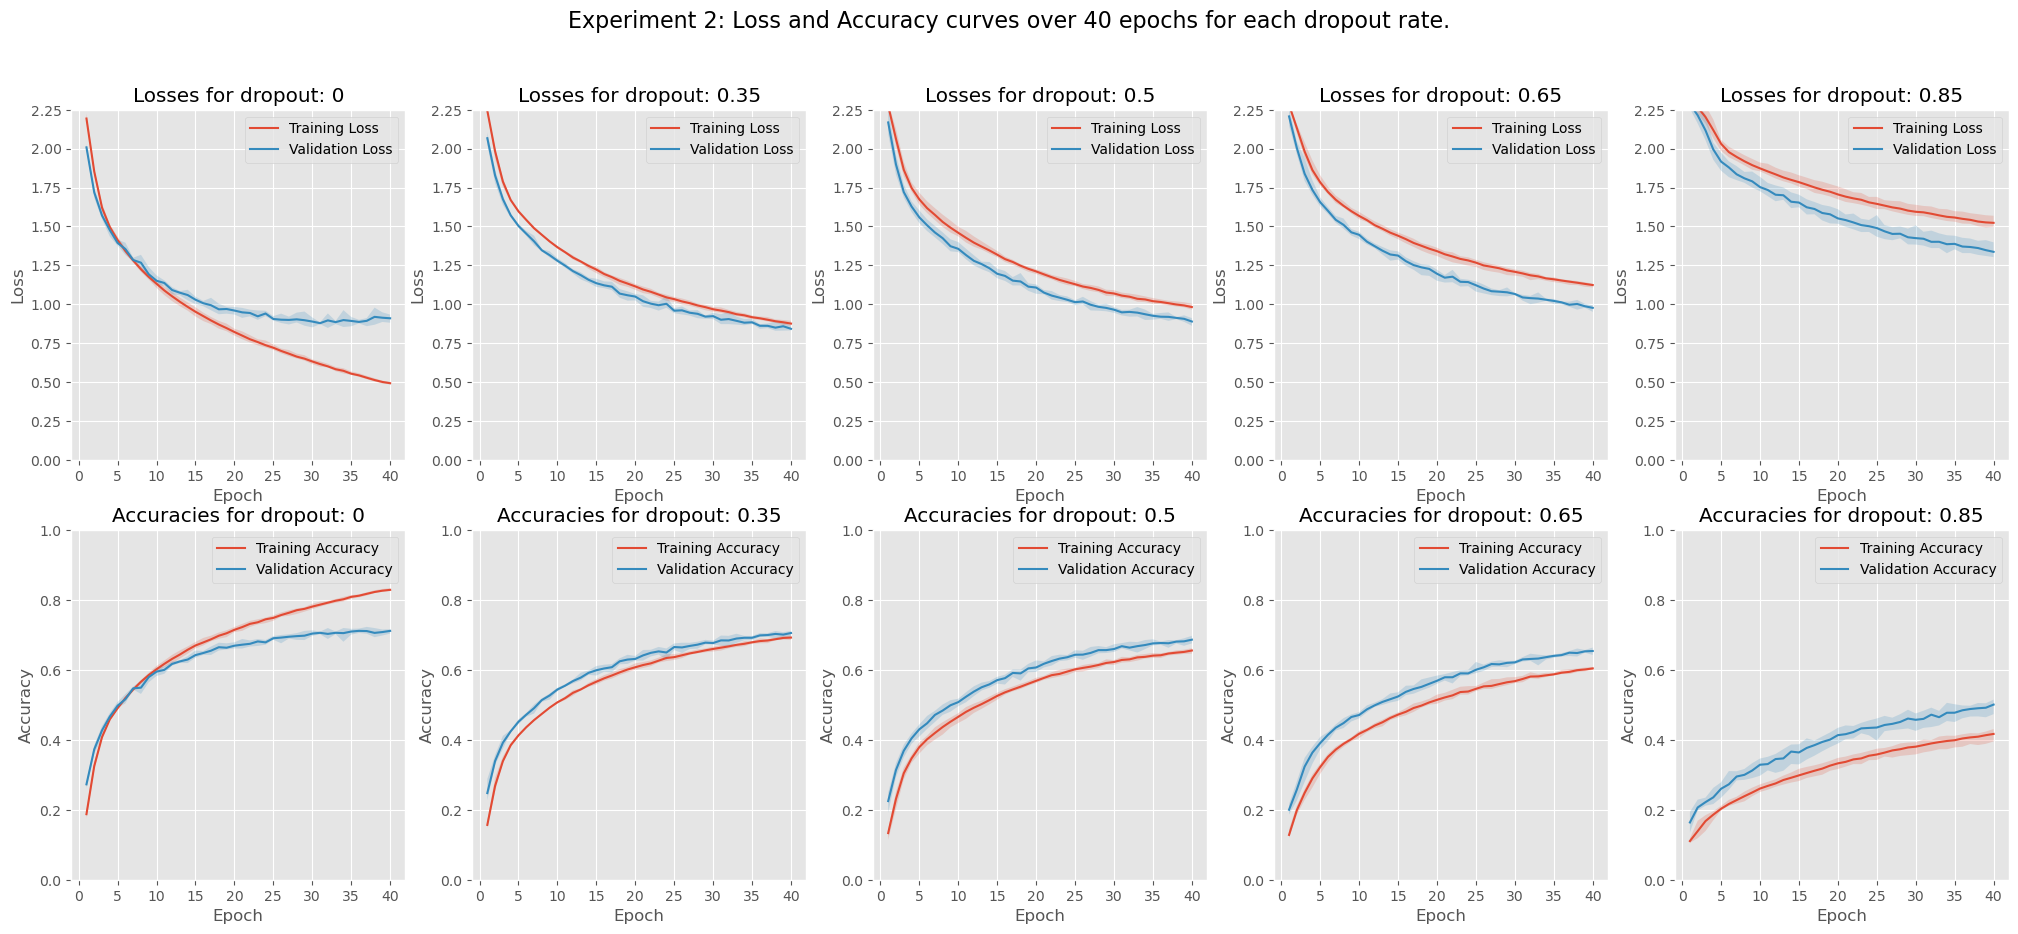

In [42]:
###
# Displaying the results of the dropout search.
###

# Load results from file
with open("exp2/results/exp2_results.pkl", "rb") as file:
    all_dropout_statistics = pickle.load(file)

# Create Super Figure for all dropout rates
fig, axs = plt.subplots(2, 5, figsize=(25, 10))
fig.suptitle(f"Experiment 2: Loss and Accuracy curves over {epochs} epochs for each dropout rate.", fontsize=16)


dropout_rates = [0, 0.35, 0.5, 0.65, 0.85]
# For each dropout rate...
for i, dr in enumerate(dropout_rates):
    # --- Thid loop displays 2 graphs side by side, one for loss and one for accuracy over the 5 experiments, averaged ---

    # get the results from this dropout rate
    dr_results = all_dropout_statistics[dr]

    # create overall lists to store values for this dropout rate.
    val_loss_values = []
    train_loss_values = []
    val_acc_values = []
    train_acc_values = []

    # iterate over each test index, adding values to overall lists.
    for idx in range(1, number_of_experiment_runs+1):
        val_loss_values.append(dr_results['val_loss'][idx])
        train_loss_values.append(dr_results['train_loss'][idx])
        val_acc_values.append(dr_results['val_acc'][idx])
        train_acc_values.append(dr_results['train_acc'][idx])
    
    # Calculate the average values for each metric over sub experiments.
    average_train_losses = np.mean(train_loss_values, axis=0)[0]
    average_val_losses = np.mean(val_loss_values, axis=0)[0]
    average_train_accs = np.mean(train_acc_values, axis=0)[0]
    average_val_accs = np.mean(val_acc_values, axis=0)[0]

    # Get the largest values for each metric over all sub experiments.
    max_train_losses = np.max(train_loss_values, axis=0)[0]
    max_val_losses = np.max(val_loss_values, axis=0)[0]
    max_train_accs = np.max(train_acc_values, axis=0)[0]
    max_val_accs = np.max(val_acc_values, axis=0)[0]

    # Get the smallest values for each metric over all sub experiments.
    min_train_losses = np.min(train_loss_values, axis=0)[0]
    min_val_losses = np.min(val_loss_values, axis=0)[0]
    min_train_accs = np.min(train_acc_values, axis=0)[0]
    min_val_accs = np.min(val_acc_values, axis=0)[0]

    # create epoch range for x axis
    epoch_range = list(range(1, epochs+1))

    # plot training and validation loss graphs
    axs[0, i].plot(epoch_range, average_train_losses, label="Training Loss") # plot average training loss
    axs[0, i].plot(epoch_range, average_val_losses, label="Validation Loss") # plot average validation loss
    axs[0, i].fill_between(epoch_range, min_train_losses, max_train_losses, alpha=0.2) # add fill between min and max train values
    axs[0, i].fill_between(epoch_range, min_val_losses, max_val_losses, alpha=0.2) # add fill between min and max val values
    axs[0, i].set_title(f"Losses for dropout: {dr}") # add title
    axs[0, i].set_xlabel("Epoch") # set x label to epoch
    axs[0, i].set_ylabel("Loss") # set y label to loss
    axs[0, i].legend() # turn on legend
    axs[0, i].grid(True) # turn on grid
    axs[0, i].set_ylim(0, 2.25) # set y limit to 2.25
    axs[0, i].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

    # plot training and validation accuracy graphs
    axs[1, i].plot(epoch_range, average_train_accs, label="Training Accuracy") # plot average training accuracy
    axs[1, i].plot(epoch_range, average_val_accs, label="Validation Accuracy") # plot average validation accuracy
    axs[1, i].fill_between(epoch_range, min_train_accs, max_train_accs, alpha=0.2) # add fill between min and max train values
    axs[1, i].fill_between(epoch_range, min_val_accs, max_val_accs, alpha=0.2) # add fill between min and max val values
    axs[1, i].set_title(f"Accuracies for dropout: {dr}") # add title
    axs[1, i].set_xlabel("Epoch") # set x label to epoch
    axs[1, i].set_ylabel("Accuracy") # set y label to accuracy
    axs[1, i].legend() # turn on legend
    axs[1, i].grid(True) # turn on grid
    axs[1, i].set_ylim(0, 1) # set y limit to 1
    axs[1, i].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

# Show super figure
plt.show()

In [73]:
###########################
# Transfer Learning Setup #
###########################

def exp2_train_and_eval_transfer_model(model, num_epochs, train_loader, val_loader):
    """
    
    This function is a near-copy of exp2_do_one_dropout_experiment, but with the ability to train and evaluate a given model.
    
    Performs one transfer learning experiment with a given model.
    
    Args:
        model: The model to use for this experiment.
        num_epochs: The number of epochs to train for.
        train_loader: The training dataloader to use.
        val_loader: The validation dataloader to use.
    
    Returns:
        train_losses: The training losses for each epoch.
        val_losses: The validation losses for each epoch.
        train_accuracies: The training accuracies for each epoch.
        val_accuracies: The validation accuracies for each epoch.
        model_list: The list of models over all epochs.
    """


    # Move model onto GPU
    model.to(device)

    # Define loss function
    loss_fn = nn.CrossEntropyLoss()

    # Define Optimizer using Experiment 1's best performing learning rate (no scheduler, as using no scheduler in experiment 1 performed best)
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

    # Create lists to store training and validation losses
    train_losses = []
    val_losses = []
    # Create lists to store training and validation accuracies
    train_accuracies = []
    val_accuracies = []

    # Create list to store models
    model_list = []

    # Train for X epochs
    for epoch in range(1, num_epochs+1):
        # Perform a pass over the training set
        model, train_true_labels, train_predicted_labels, train_loss = exp1_train(model, train_loader, loss_fn, optimizer, device) # turns out exp1 train fn can be used for this, no need to remake it. (i think...)
        # Calculate training accuracy
        train_acc = accuracy_score(train_true_labels, train_predicted_labels)

        # Perform a pass over the validation set.
        model, val_true_labels, val_predicted_labels, val_loss = exp1_evaluate(model, val_loader, loss_fn, device) # same story here, should be fine to use exp1's evaluate function.
        
        # calculate validation accuracy
        val_acc = accuracy_score(val_true_labels, val_predicted_labels)

        # Add losses, accuracies and models to lists
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        model_list.append(model)
        
        # Print loss and accuracy values to see how training is going.
        print(f"        Epoch {epoch} train loss: {train_loss}, val loss: {val_loss}, train acc: {train_acc}, val acc: {val_acc}")


    # Return the losses and accuracies for this experiment with model list
    return train_losses, val_losses, train_accuracies, val_accuracies, model_list




# load all models from the dropout search

with open("exp2/models/best_dropout_models.pkl", "rb") as file:
    dropout_models = pickle.load(file)


# # Load the zero dropout model from the first part of the experiment.
best_zero_dropout_model = dropout_models[0][4]['model']
bst_nd_mdl_vl = dropout_models[0][4]['val_loss']
print(f"Best zero dropout model loaded from epoch {dropout_models[0][4]['epoch']} with val loss {bst_nd_mdl_vl}")

# Find and Load the best performing dropout model
best_dropout_model = dropout_models[0.35][2]['model']
bst_do_mdl_vl = dropout_models[0.35][2]['val_loss']
print(f"Best dropout model loaded from epoch {dropout_models[0.35][2]['epoch']} with val loss {bst_do_mdl_vl}")

print("--------------------------------------------------------------------")




Best zero dropout model loaded from epoch 32 with val loss 0.8471960276746384
Best dropout model loaded from epoch 38 with val loss 0.8289597420893666
--------------------------------------------------------------------


In [74]:
##
# Test both models on the test set, without the swap.
##

# test the no dropout model before transfer learning task on the held test set.

best_zero_dropout_model, true_test_labels_no_dropout_model, predicted_test_labels_no_dropout_model, average_test_loss_no_dropout_model = exp1_evaluate(best_zero_dropout_model, test_loader, nn.CrossEntropyLoss(), device)
print(f"Best zero dropout model tested on test set without transfer learning task has average test loss of: {average_test_loss_no_dropout_model}")

# best dropout model after transfer learning task on the held test set.

best_dropout_model, true_test_labels_best_dropout_model, predicted_test_labels_best_dropout_model, average_test_loss_best_dropout_model = exp1_evaluate(best_dropout_model, test_loader, nn.CrossEntropyLoss(), device)
print(f"Best dropout model tested on test set without transfer learning task has average test loss of: {average_test_loss_best_dropout_model}")
print("--------------------------------------------------------------------")
    

# REMEMBER TO PLOT A BAR CHART FOR BOTH MODELS AFTER THIS!!!!!

Best zero dropout model tested on test set without transfer learning task has average test loss of: 0.8947452898985281
Best dropout model tested on test set without transfer learning task has average test loss of: 0.825200680345773
--------------------------------------------------------------------


In [75]:

##
# Transfer Learning Task
##

# freeze zero dropout model's convolutional layers and reset linear layers
for layer in best_zero_dropout_model.parameters():
    if isinstance(layer, nn.Conv2d):
        # Freeze convolutional layers
        layer.requires_grad = False
    if isinstance(layer, nn.Linear):
        # Reset linear layers
        layer.reset_parameters()

# freeze dropout model's convolutional layers and reset linear layers
for layer in best_dropout_model.parameters():
    if isinstance(layer, nn.Conv2d):
        print("Froze Conv2d layer.")
        # Freeze convolutional layers
        layer.requires_grad = False
    if isinstance(layer, nn.Linear):
        # Reset linear layers
        print("Reset Linear layer.")
        layer.reset_parameters()



fine_tune_epochs = 15
# Train and evaluate the zero dropout model on the transfer learning task over 5 epochs.
zero_do_train_losses, zero_do_val_losses, zero_do_train_accuracies, zero_do_val_accuracies, zero_do_model_list = exp2_train_and_eval_transfer_model(best_zero_dropout_model, fine_tune_epochs, train_loader=set_2_loader, val_loader=set_1_loader)  # Swapped the train and val loaders around here. 

# Train and evaluate the best dropout model on the transfer learning task over 5 epochs.
best_do_train_losses, best_do_val_losses, best_do_train_accuracies, best_do_val_accuracies, best_do_model_list = exp2_train_and_eval_transfer_model(best_dropout_model, fine_tune_epochs, train_loader=set_2_loader, val_loader=set_1_loader)  # And here.


        Epoch 1 train loss: 0.8253793989682137, val loss: 0.5640833564197926, train acc: 0.71712, val acc: 0.80808
        Epoch 2 train loss: 0.7555365147797958, val loss: 0.5637196748496016, train acc: 0.73696, val acc: 0.80552
        Epoch 3 train loss: 0.7114170200913154, val loss: 0.5458281170338621, train acc: 0.75508, val acc: 0.81884
        Epoch 4 train loss: 0.6774636861842002, val loss: 0.5470320345343226, train acc: 0.76624, val acc: 0.81156
        Epoch 5 train loss: 0.6534932016792809, val loss: 0.5555913413272184, train acc: 0.77432, val acc: 0.80488
        Epoch 6 train loss: 0.6282823755003303, val loss: 0.5518728544949876, train acc: 0.78292, val acc: 0.80812
        Epoch 7 train loss: 0.6061392834271921, val loss: 0.5739877647374902, train acc: 0.79104, val acc: 0.7966
        Epoch 8 train loss: 0.5856474670188506, val loss: 0.5716597304472228, train acc: 0.79672, val acc: 0.80064
        Epoch 9 train loss: 0.5728205134496664, val loss: 0.5672530262823909, tra

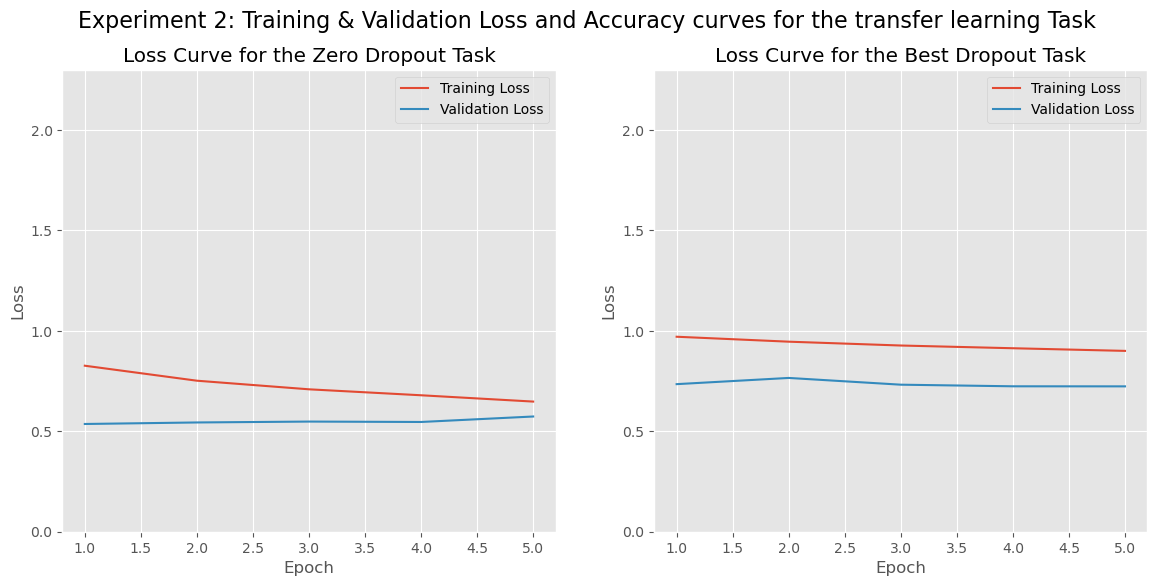

In [70]:
###
# Plot results from training and validation of both models on the transfer learning task.
###


epoch_range = list(range(1, fine_tune_epochs+1))

average_train_accs = zero_do_train_losses

# Create Super Figure for all learning rates
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

fig.suptitle(f"Experiment 2: Training & Validation Loss and Accuracy curves for the transfer learning Task", fontsize=16)


# plot training and validation loss graphs for zero dropout model
axs[0].plot(epoch_range, zero_do_train_losses, label="Training Loss") # plot average training loss
axs[0].plot(epoch_range, zero_do_val_losses, label="Validation Loss") # plot average validation loss
axs[0].set_title("Loss Curve for the Zero Dropout Model") # add title
axs[0].set_xlabel("Epoch") # set x label to epoch
axs[0].set_ylabel("Loss") # set y label to loss
axs[0].legend() # turn on legend
axs[0].grid(True) # turn on grid
axs[0].set_ylim(0, 2.3) # set y limit to 2.3
# axs[0].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs

# plot training and validation loss graphs for best dropout model
axs[1].plot(epoch_range, best_do_train_losses, label="Training Loss") # plot average training loss
axs[1].plot(epoch_range, best_do_val_losses, label="Validation Loss") # plot average validation loss
axs[1].set_title("Loss Curve for the Best Dropout Model") # add title
axs[1].set_xlabel("Epoch") # set x label to epoch
axs[1].set_ylabel("Loss") # set y label to loss
axs[1].legend() # turn on legend
axs[1].grid(True) # turn on grid
axs[1].set_ylim(0, 2.3) # set y limit to 2.3
# axs[1].set_xticks(np.arange(0, 41, 5)) # set x ticks to every 5 epochs


# Show the super figure

plt.show()

In [ ]:

# ###
# # Transfer Learning Experiment
# ###


# # Dropout Model Experiment - only running one experiment as spec doesn't specify to run multiple.
# train_losses, val_losses, train_accuracies, val_accuracies, model_list = exp2_do_one_dropout_experiment(None, 1, 40, train_loader=set_2_loader, val_loader=set_1_loader)



# # Zero Dropout Model Experiment - only running one experiment as spec doesn't specify to run multiple.
# train_losses, val_losses, train_accuracies, val_accuracies, model_list = exp2_do_one_dropout_experiment(0, 1, 40, train_loader=set_2_loader, val_loader=set_1_loader)

### Experiment 3 (19 MARKS) <ignore>

*Write up results for Experiment 3 here*

In [ ]:
#############################
### Code for Experiment 3 ###
#############################

# Conclusions and Discussion (instructions) - 25 MARKS <ignore>
In this section, you are expected to:
* briefly summarise and describe the conclusions from your experiments (8 MARKS).
* discuss whether or not your results are expected, providing scientific reasons (8 MARKS).
* discuss two or more alternative/additional methods that may enhance your model, with scientific reasons (4 MARKS). 
* Reference two or more relevant academic publications that support your discussion. (4 MARKS)

*Write your Conclusions/Discussion here*

# References (instructions) <ignore>
Use the cell below to add your references. A good format to use for references is like this:

[AB Name], [CD Name], [EF Name] ([year]), [Article title], [Journal/Conference Name] [volume], [page numbers] or [article number] or [doi]

Some examples:

JEM Bennett, A Phillipides, T Nowotny (2021), Learning with reinforcement prediction errors in a model of the Drosophila mushroom body, Nat. Comms 12:2569, doi: 10.1038/s41467-021-22592-4

SO Kaba, AK Mondal, Y Zhang, Y Bengio, S Ravanbakhsh (2023), Proc. 40th Int. Conf. Machine Learning, 15546-15566

# References

A. Krizhevsky and G. Hinton (2009), Learning multiple layers of features from tiny images.

B. Recht and R. Roelofs and L Schmidt and Vaishaal Shankar (2018), Do CIFAR-10 Classifiers Generalize to CIFAR-10?, arXiv preprint arXiv:1806.00451.

N. Srivastava and G. Hinton and A. Krizhevsky and R. Salakhutdinov (2014), Dropout: A Simple Way to Prevent Neural Networks from Overfitting, The Journal of Machine Learning Research 15(1) pp. 1929-1958

T. Sinha and B. Verma and A. Haidar (2017), Optimization of convolutional neural network parameters for image classification, 2017 IEEE Symposium Series on Computational Intelligence (SSCI), Honolulu, HI, USA, 2017, pp. 1-7, doi: 10.1109/SSCI.2017.8285338.